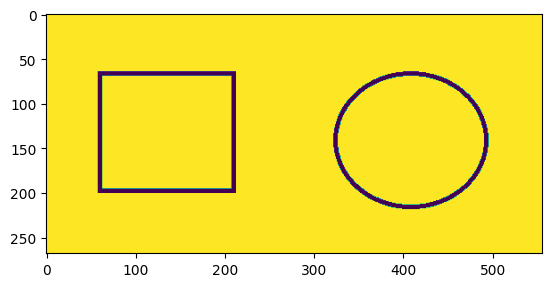

In [1]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
##Reading images
image = cv2.imread("imag1.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image2 = cv2.imread("imag2.png")
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)


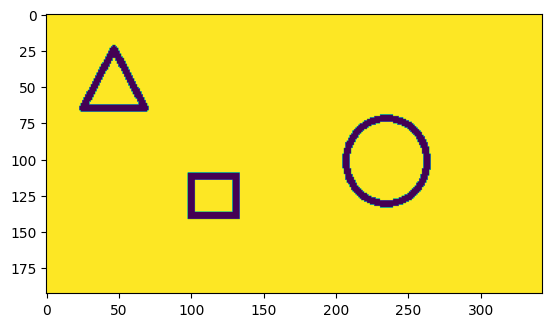

In [2]:
plt.imshow(image2_gray)


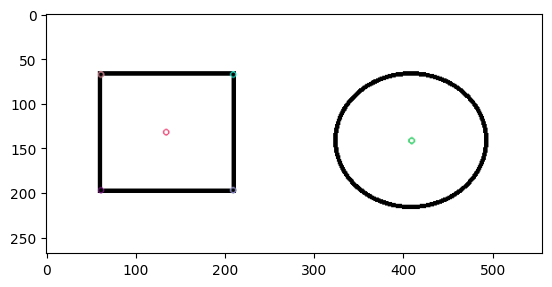

In [4]:
#keypoints of img1
sift =cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(image,None)
img_1 = cv2.drawKeypoints(gray,keypoints_1,image)
plt.imshow(img_1)

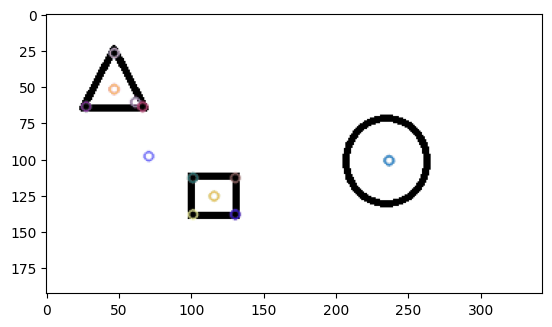

In [5]:
keypoints_2, descriptors_2 = sift.detectAndCompute(image2_gray,None)
img_2 = cv2.drawKeypoints(image2_gray,keypoints_2,image2)

plt.imshow(img_2)

In [6]:
# check the number of keypoints in both images
print(len(keypoints_1), len(keypoints_2))

12 24


In [7]:
# define a function to calculate the eucl. distance
# between vector and array
import math as m

def dis(v,arr):
    i=0 # keep track of the index
    l=[]
    for d in arr:
        l.append((m.dist(v,d),i))
        i+=1
    return l

# calculate the distance and sort the results
knn=sorted(dis(descriptors_1[0],descriptors_2))
# print nearest 5
print(knn[0:5])
# pick the index of nearst point
nearest= knn[0][1]
print(nearest)

[(6.855654600401044, 12), (38.84584919911006, 19), (60.88513775955508, 17), (320.31078658078314, 10), (341.40298768464226, 0)]
12


In [8]:
#get the corrdinates of keypoint_1[0] and keypoint_2[nearest]
a,b=keypoints_1[0].pt
a=int(a)
b=int(b)

c,d=keypoints_2[nearest].pt
c=int(c)
d=int(d)

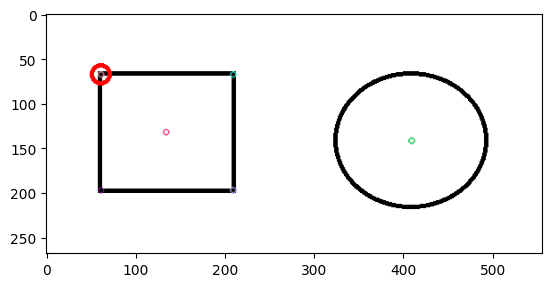

In [9]:
# draw circle around keypoints_1[0]
img1Copy=image.copy()
cv2.circle(img1Copy,(a,b) , 10, (255, 0, 0), thickness=3)
plt.imshow(img1Copy)

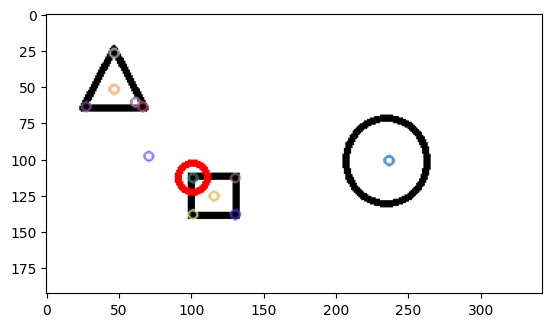

In [10]:
#draw circle around keypoint_2[nearest]
img2Copy=image2.copy()
cv2.circle(img2Copy,(c,d), 10, (255, 0, 0), thickness=3)
plt.imshow(img2Copy)

In [11]:
type(descriptors_1)

numpy.ndarray